In [18]:
import os
import string
import nltk
import pandas as pd
import networkx as nx
from PyPDF2 import PdfReader  # Use PyPDF2 for PDF extraction
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
# Specify the folder path containing research papers
FOLDER_PATH = "./ResearchPaper"  # Replace with your folder path

In [13]:
# Function to extract text from PDF or TXT files
def extract_text_from_file(file_path):
    if file_path.endswith(".txt"):
        with open(file_path, "r", encoding="utf-8") as f:
            return f.read()
    elif file_path.endswith(".pdf"):
        pdf_text = ""
        with open(file_path, "rb") as pdf_file:
            reader = PdfReader(pdf_file)
            for page in reader.pages:
                pdf_text += page.extract_text() or ""  # Handle empty pages gracefully
        return pdf_text
    return ""

In [14]:
# Load all papers into a dictionary
papers = {}
for file_name in os.listdir(FOLDER_PATH):
    file_path = os.path.join(FOLDER_PATH, file_name)
    if file_name.endswith((".pdf")):
        papers[file_name] = extract_text_from_file(file_path)

In [15]:
# Preprocessing Function
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [16]:
# Apply TextRank Algorithm
def textrank(text, top_n=5):
    words = preprocess(text)
    graph = nx.Graph()

    for i in range(len(words) - 1):
        graph.add_edge(words[i], words[i + 1])

    scores = nx.pagerank(graph)
    ranked_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [word for word, _ in ranked_words]

In [27]:
# Extract Key Concepts from Each Paper
key_concepts = []
for paper_name, content in papers.items():
    concepts = textrank(content)
    for concept in concepts:
        # Expanded keyword list for relevance determination
        if concept in ["ai", "machine", "learning", "nlp", "ethics", "deep", "chatbot", "artificial", "intelligence", "neural", "networks", "algorithm", "model", "data", "computer", "vision", "robotics", "automation", "system"]:
            relevance = "Highly Relevant"
        elif concept in ["networks", "devices", "real-time", "internet", "things", "iot", "cloud", "computing", "security", "privacy"]:
            relevance = "Relevant"
        elif concept in ["technology", "innovation", "development", "research", "application", "methodology", "performance", "analysis"]:
            relevance = "Moderately Relevant"
        else:
            relevance = "Irrelevant"
        key_concepts.append(
            {"Paper": paper_name, "Key Concept": concept, "Relevance": relevance}
        )

In [ ]:
# prompt: add as many more keywords as yu can

import os
import string
import nltk
import pandas as pd
import networkx as nx
from PyPDF2 import PdfReader  # Use PyPDF2 for PDF extraction
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter  # Import Counter for keyword frequency analysis

nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger') # Download for part-of-speech tagging
nltk.download('wordnet') # Download for lemmatization

# Specify the folder path containing research papers
FOLDER_PATH = "./ResearchPaper"  # Replace with your folder path

# Function to extract text from PDF or TXT files
def extract_text_from_file(file_path):
    if file_path.endswith(".txt"):
        with open(file_path, "r", encoding="utf-8") as f:
            return f.read()
    elif file_path.endswith(".pdf"):
        pdf_text = ""
        with open(file_path, "rb") as pdf_file:
            reader = PdfReader(pdf_file)
            for page in reader.pages:
                pdf_text += page.extract_text() or ""  # Handle empty pages gracefully
        return pdf_text
    return ""

# Load all papers into a dictionary
papers = {}
for file_name in os.listdir(FOLDER_PATH):
    file_path = os.path.join(FOLDER_PATH, file_name)
    if file_name.endswith((".pdf", ".txt")): # Include .txt files
        papers[file_name] = extract_text_from_file(file_path)

# Preprocessing Function (enhanced)
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    # Add more stopwords
    stop_words.update(["may", "also", "would", "could", "should"])
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()] # Remove non-alphanumeric words


    #Lemmatization
    wnl = nltk.stem.WordNetLemmatizer()
    lemmas = [wnl.lemmatize(t) for t in filtered_tokens]

    return lemmas


# Apply TextRank Algorithm (with more keywords)
def textrank(text, top_n=10):  # Increased top_n
    words = preprocess(text)
    graph = nx.Graph()

    for i in range(len(words) - 1):
        graph.add_edge(words[i], words[i + 1])

    scores = nx.pagerank(graph)
    ranked_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [word for word, _ in ranked_words]

# Extract Key Concepts from Each Paper
key_concepts = []
for paper_name, content in papers.items():
    concepts = textrank(content)
    for concept in concepts:
        # Expanded keyword list for relevance determination
        if concept in ["ai", "machine", "learning", "nlp", "ethics", "deep", "chatbot", "artificial", "intelligence", "neural", "networks", "algorithm", "model", "data", "computer", "vision", "robotics", "automation", "system"]:
            relevance = "Highly Relevant"
        elif concept in ["networks", "devices", "real-time", "internet", "things", "iot", "cloud", "computing", "security", "privacy"]:
            relevance = "Relevant"
        elif concept in ["technology", "innovation", "development", "research", "application", "methodology", "performance", "analysis"]:
            relevance = "Moderately Relevant"
        else:
            relevance = "Irrelevant"
        key_concepts.append(
            {"Paper": paper_name, "Key Concept": concept, "Relevance": relevance}
        )

# Convert to DataFrame for analysis (optional)
df_key_concepts = pd.DataFrame(key_concepts)
print(df_key_concepts)

# Keyword Frequency Analysis (optional)
all_keywords = [item["Key Concept"] for item in key_concepts]
keyword_counts = Counter(all_keywords)
print("\nKeyword Frequency:")
print(keyword_counts.most_common(10))  # Print top 10 most frequent keywords



In [28]:
# Load all papers into a dictionary
papers = {}
for file_name in os.listdir(FOLDER_PATH):
    file_path = os.path.join(FOLDER_PATH, file_name)
    if file_name.endswith((".pdf")):
        papers[file_name] = extract_text_from_file(file_path)

In [29]:
# Convert results to DataFrame
result_df = pd.DataFrame(key_concepts)

In [30]:
# Display results
print(result_df)

                                                Paper  Key Concept  \
0        Artificial Intelligence in Smart Tourism.pdf      tourism   
1        Artificial Intelligence in Smart Tourism.pdf        smart   
2        Artificial Intelligence in Smart Tourism.pdf         data   
3        Artificial Intelligence in Smart Tourism.pdf     business   
4        Artificial Intelligence in Smart Tourism.pdf  information   
5   A critical review of state-of-the-art chatbot ...     chatbots   
6   A critical review of state-of-the-art chatbot ...      chatbot   
7   A critical review of state-of-the-art chatbot ...         2019   
8   A critical review of state-of-the-art chatbot ...         2018   
9   A critical review of state-of-the-art chatbot ...           et   
10                             Surgical_Education.pdf           ai   
11                             Surgical_Education.pdf     chatbots   
12                             Surgical_Education.pdf          use   
13                  

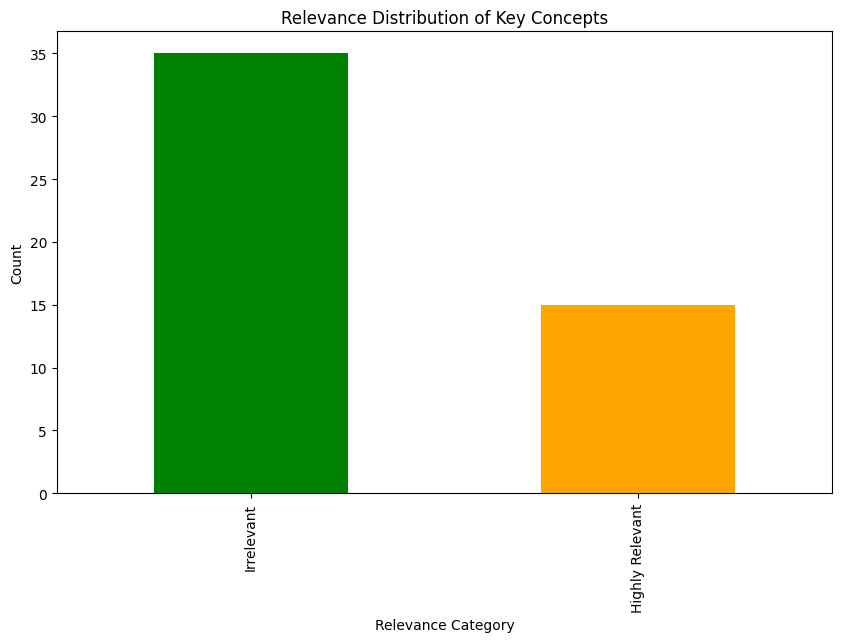

In [31]:
# Plot relevance distribution
plt.figure(figsize=(10, 6))
result_df["Relevance"].value_counts().plot(kind="bar", color=["green", "orange", "red"])
plt.title("Relevance Distribution of Key Concepts")
plt.xlabel("Relevance Category")
plt.ylabel("Count")
plt.show()

In [26]:
# Save results to CSV
result_df.to_csv("key_concepts_with_relevance.csv", index=False)